##  imports

In [110]:
import pandas as pd 
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt

In [111]:
stocks = pd.read_csv('./stocks.csv')
daily_ret = pd.read_csv('./daily_returns.csv')

In [112]:
stocks = stocks.drop(columns='Unnamed: 0') # drop index column

In [113]:
stocks

date        sp500         GOOG        AAPL        NVDA        AMD  \
0     2015-11-24  2089.139893   748.280029   29.719999   31.170000   2.340000   
1     2015-11-25  2088.870117   748.150024   29.507500   31.129999   2.380000   
2     2015-11-27  2090.110107   750.260010   29.452499   31.389999   2.330000   
3     2015-11-30  2080.409912   742.599976   29.575001   31.719999   2.360000   
4     2015-12-01  2102.629883   767.039978   29.334999   32.750000   2.340000   
...          ...          ...          ...         ...         ...        ...   
1254  2020-11-17  3609.530029  1770.150024  119.389999  536.890015  83.360001   
1255  2020-11-18  3567.790039  1746.780029  118.029999  537.150024  82.540001   
1256  2020-11-19  3581.870117  1763.920044  118.639999  537.609985  85.540001   
1257  2020-11-20  3557.540039  1742.189941  117.339996  523.510010  84.639999   
1258  2020-11-23  3577.590088  1734.859985  113.849998  525.599976  85.309998   

            MSFT  
0      54.250000  
1      53.689999  
2      53.930000  
3      54.349998  
4      55.220001  
...          ...  
1254  214.460007  
1255  211.080002  
1256  212.419998  
1257  210.389999  
1258  210.110001  

[1259 rows x 7 columns]

In [114]:
daily_ret = daily_ret.drop(columns='Unnamed: 0') # drop index column

In [115]:
daily_ret

date        sp500        GOOG       AAPL       NVDA       AMD  \
0     2015-11-24  2089.139893  748.280029  29.719999  31.170000  2.340000   
1     2015-11-25    -0.012913   -0.017374  -0.715003  -0.128332  1.709402   
2     2015-11-27     0.059362    0.282027  -0.186397   0.835207 -2.100840   
3     2015-11-30    -0.464100   -1.020984   0.415931   1.051290  1.287554   
4     2015-12-01     1.068057    3.291140  -0.811503   3.247166 -0.847458   
...          ...          ...         ...        ...        ...       ...   
1254  2020-11-17    -0.479193   -0.630409  -0.756446  -0.688106 -0.441899   
1255  2020-11-18    -1.156383   -1.320227  -1.139124   0.048429 -0.983685   
1256  2020-11-19     0.394644    0.981235   0.516818   0.085630  3.634601   
1257  2020-11-20    -0.679256   -1.231921  -1.095754  -2.622714 -1.052142   
1258  2020-11-23     0.563593   -0.420732  -2.974261   0.399222  0.791587   

           MSFT  
0     54.250000  
1     -1.032260  
2      0.447012  
3      0.778784  
4      1.600742  
...         ...  
1254  -1.275141  
1255  -1.576054  
1256   0.634828  
1257  -0.955653  
1258  -0.133085  

[1259 rows x 7 columns]

In [116]:
daily_ret.iloc[0,1:] = 0

In [117]:
daily_ret # zero out the first day

date     sp500      GOOG      AAPL      NVDA       AMD      MSFT
0     2015-11-24  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1     2015-11-25 -0.012913 -0.017374 -0.715003 -0.128332  1.709402 -1.032260
2     2015-11-27  0.059362  0.282027 -0.186397  0.835207 -2.100840  0.447012
3     2015-11-30 -0.464100 -1.020984  0.415931  1.051290  1.287554  0.778784
4     2015-12-01  1.068057  3.291140 -0.811503  3.247166 -0.847458  1.600742
...          ...       ...       ...       ...       ...       ...       ...
1254  2020-11-17 -0.479193 -0.630409 -0.756446 -0.688106 -0.441899 -1.275141
1255  2020-11-18 -1.156383 -1.320227 -1.139124  0.048429 -0.983685 -1.576054
1256  2020-11-19  0.394644  0.981235  0.516818  0.085630  3.634601  0.634828
1257  2020-11-20 -0.679256 -1.231921 -1.095754 -2.622714 -1.052142 -0.955653
1258  2020-11-23  0.563593 -0.420732 -2.974261  0.399222  0.791587 -0.133085

[1259 rows x 7 columns]

## beta calculation

In [118]:
# beta = 1 indicates strong market correlation
# beta > 1 indicates strong security volatility compared to the market
# beta < 1 indicates less volatility compared to the market, and that's usually prefered

#### Nvidia

In [119]:
NVbeta, NValpha = np.polyfit(daily_ret['sp500'], daily_ret['NVDA'], 1) # compare Nvidia to the market

In [120]:
print("{}'s beta is {}, while alpha is {}".format('Nvidia', beta, alpha))

Nvidia's beta is 1.500620854519554, while alpha is 0.2925933873187987


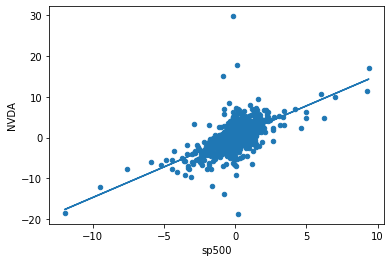

In [121]:
daily_ret.plot(kind = 'scatter', x = 'sp500', y = 'NVDA')
plt.plot(daily_ret['sp500'], beta * daily_ret['sp500'] + alpha)
plt.show()

#### AMD

In [122]:
AMDbeta, AMDalpha = np.polyfit(daily_ret['sp500'], daily_ret['AMD'], 1) # compare AMD to the market

In [123]:
print("{}'s beta is {}, while alpha is {}".format('AMD', beta, alpha))

AMD's beta is 1.500620854519554, while alpha is 0.2925933873187987


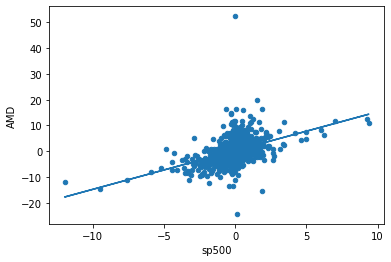

In [124]:
daily_ret.plot(kind = 'scatter', x = 'sp500', y = 'AMD')
plt.plot(daily_ret['sp500'], beta * daily_ret['sp500'] + alpha)
plt.show()

## beta formula

In [130]:
daily_ret['sp500'].mean()

0.050198742305160825

In [131]:
rate_of_ret = daily_ret['sp500'].mean() * 252 # annualized rate of return (252 open days out of the 365)
print(rate_of_ret)

12.650083060900528


In [135]:
risk_free = 0 # assuming zero risk free rate

NVsecurity_ret = risk_free + NVbeta * (rate_of_ret - risk_free) # beta of NV
AMDsecurity_ret = risk_free + AMDbeta * (rate_of_ret - risk_free) # beta of AMD

In [146]:
print('One should expect {:.2f}% return in order to invest in Nvidia,'.format(NVsecurity_ret))
print('while AMD should be expected as of a percentage of {:.2f}% in order to justify the risk.'.format(AMDsecurity_ret))

One should expect 19.24% return in order to invest in Nvidia,
while AMD should be expected as of a percentage of 18.98% in order to justify the risk.
